## Text Mining

In [74]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from textblob import TextBlob
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
import spacy
from spacy.lang.en import STOP_WORDS

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
reviews=pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [4]:
reviews.head(25)

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
5,rn572308369,"Reviewed April 9, 2018",Kathu,Thong Dee The Kathu Brasserie,We travel to Phuket every year from Australia ...
6,rn572053040,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,Had roast beef and lamb plenty of it and very ...
7,rn571915434,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,This place has a lot to learn when it comes to...
8,rn571792182,"Reviewed April 7, 2018",Kathu,Thong Dee The Kathu Brasserie,This restaurant oozes class as soon as you ent...
9,rn571778672,"Reviewed April 7, 2018",Kathu,Thong Dee The Kathu Brasserie,"Put simply, just one of the best dining experi..."


In [5]:
print('\U0001F600')

😀


In [6]:
print('This is \n an example')

This is 
 an example


In [7]:
'\155'

'm'

In [8]:
'\012'

'\n'

In [9]:
reviews.Location.value_counts().index

Index([' Patong', ' Karon', ' Kata Beach', ' Rawai', ' Choeng Thale',
       ' Phuket Town', ' Kamala', ' Mai Khao', ' Cape Panwa', ' Chalong',
       ' Thalang District', ' Kathu', ' Nai Yang', ' Nai Harn',
       ' Bang Tao Beach', ' Karon Beach', ' Wichit', ' Talat Yai', ' Koh Kaew',
       ' Kata Noi Beach', ' Pa Khlok', ' Ratsada', ' Talat Nuea', ' Nai Thon',
       ' Sakhu'],
      dtype='object')

In [10]:
location_of_interest=[' Patong', ' Kamala']

In [11]:
hotels_in_location = reviews[reviews.Location.isin(location_of_interest)]

In [12]:
len(hotels_in_location['Hotel/Restaurant name'].value_counts().index)

196

In [13]:
len(hotels_in_location['Hotel/Restaurant name'].unique())

196

In [14]:
## picking is sequence
hotels_in_sequence=hotels_in_location['Hotel/Restaurant name'].unique()[30:60]

In [15]:
np.random.seed(20)
random_30_hotels=np.random.choice(hotels_in_location['Hotel/Restaurant name'].unique(), 30, replace=False)

In [16]:
final_30 = reviews[['Hotel/Restaurant name', 'Review']][reviews['Hotel/Restaurant name'].isin(random_30_hotels)]
final_30=final_30.reset_index(drop=True)
final_30

,Hotel/Restaurant name,Review
0,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...
1,Sizzle Rooftop Restaurant,My husband & I had dinner here for our 10 Year...
2,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...
3,Sizzle Rooftop Restaurant,This was a very high end dining experience on ...
4,Sizzle Rooftop Restaurant,One of the best meals we had in the three week...
...,...,...
2958,The Port,We really like what we order; the plate with t...
2959,The Port,Tasty. Good service.\r\nReasonable prices.\r\n...
2960,The Port,We have traveled to Patong several times over ...
2961,The Port,Clean and nice location food ok but staff and ...


<AxesSubplot:>

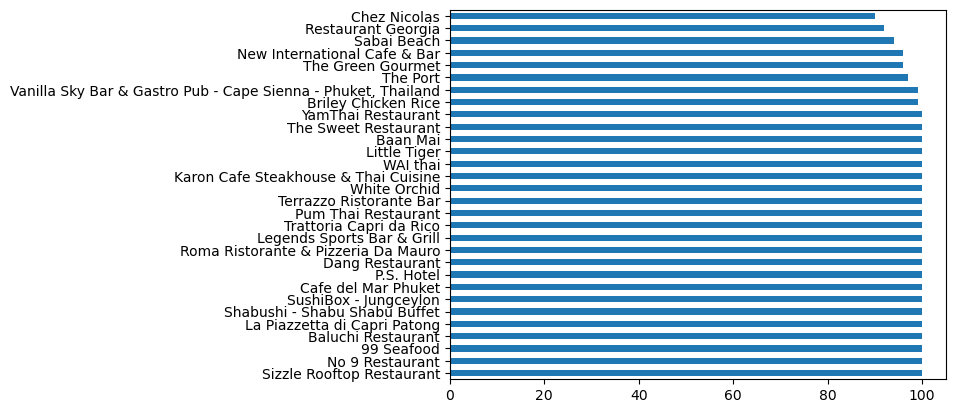

In [17]:
final_30['Hotel/Restaurant name'].value_counts().plot(kind='barh')

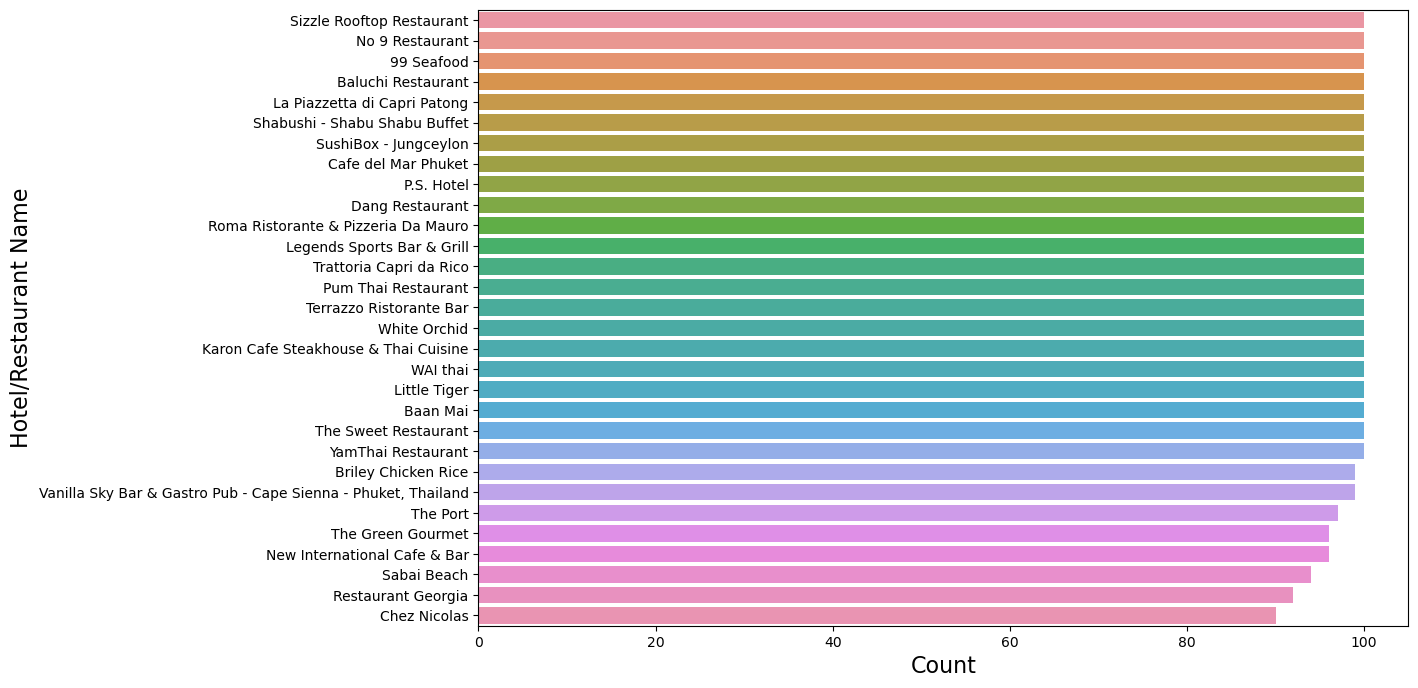

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Hotel/Restaurant name', data=final_30,
              order=final_30['Hotel/Restaurant name'].value_counts().index)
plt.ylabel('Hotel/Restaurant Name', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

### Data Cleaning

In [19]:
reviews.Review.iloc[18]

"Nice & amazing place place...... <f0><U+009F><U+0098><U+008B><f0><U+009F><U+0099><U+0082>the welcom, ,,,food &service was great like always, ,,just come and visit ThongDee ^^^i hope your dinner time&money won't. be wasted <f0><U+009F><U+0098><U+0089><f0><U+009F><U+0098><U+0089><f0><U+009F><U+0098><U+0089>i really recommend tjis Thong Dee for everyone, ,,food & staff & patrik and Chef phonchan also very great&nice...More"

In [20]:
print('\u0098')




In [21]:
chr(int('f0', 16))

'ð'

In [22]:
what_i_want=re.compile('[a-zA-Z]+')

' '.join(re.findall('[a-zA-Z]+', reviews.Review.iloc[18]))

'Nice amazing place place f U F U U B f U F U U the welcom food service was great like always just come and visit ThongDee i hope your dinner time money won t be wasted f U F U U f U F U U f U F U U i really recommend tjis Thong Dee for everyone food staff patrik and Chef phonchan also very great nice More'

In [25]:
cleaned=' '.join([c for c in re.findall('[a-zA-Z]+', reviews.Review.iloc[18]) if len(c) >1])
cleaned

'Nice amazing place place the welcom food service was great like always just come and visit ThongDee hope your dinner time money won be wasted really recommend tjis Thong Dee for everyone food staff patrik and Chef phonchan also very great nice More'

help, helping, helped

In [24]:
english_pipeline = spacy.load('en_core_web_sm')

In [28]:
' '.join([word.lemma_ for word in  english_pipeline(cleaned)])

'nice amazing place place the welcom food service be great like always just come and visit ThongDee hope your dinner time money win be waste really recommend tji Thong Dee for everyone food staff patrik and Chef phonchan also very great nice more'

In [29]:
' '.join([word.lemma_ for word in  english_pipeline('I am helping the helper who helped a friend help another friend')])

'I be help the helper who help a friend help another friend'

In [30]:
'I AM HUNGRY'.lower()

'i am hungry'

In [40]:
def lemmatizer(text):
    return [word.lemma_ for word in  english_pipeline(text)]


def data_cleaner(text: str) -> str:
    
    """
    A functon that cleans a text data
    
    Args:
    ====
    
    text (str): the text that needs cleaning
    
    Returns:
    =======
    
    The clean version of the test sent in
    """
    
    text=re.findall('[a-zA-Z]+', text) ## extract only alphabets
    text=' '.join([c for c in text if len(c) >1]) ## join after extracting the alphabets
    text=text.lower() ## convert texts to lower case
    text = ' '.join([word for word in text.split() if word not in STOP_WORDS])
    lemmatized = lemmatizer(text)
    cleaned= ' '.join(lemmatized)
    
    return cleaned

In [41]:
reviews.Review.iloc[18]

"Nice & amazing place place...... <f0><U+009F><U+0098><U+008B><f0><U+009F><U+0099><U+0082>the welcom, ,,,food &service was great like always, ,,just come and visit ThongDee ^^^i hope your dinner time&money won't. be wasted <f0><U+009F><U+0098><U+0089><f0><U+009F><U+0098><U+0089><f0><U+009F><U+0098><U+0089>i really recommend tjis Thong Dee for everyone, ,,food & staff & patrik and Chef phonchan also very great&nice...More"

In [42]:
data_cleaner(reviews.Review.iloc[18])

'nice amazing place place welcom food service great like come visit thongdee hope dinner time money win waste recommend tjis thong dee food staff patrik chef phonchan great nice'

In [44]:
final_30.loc[:, 'Clean_Reviews'] = final_30.loc[:, 'Review'].apply(data_cleaner)

In [45]:
final_30.head()

,Hotel/Restaurant name,Review,Clean_Reviews
0,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...,pleasure visit sizzle rooftop restaurant speci...
1,Sizzle Rooftop Restaurant,My husband & I had dinner here for our 10 Year...,husband dinner year wedding anniversary food d...
2,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...,pleasure visit sizzle rooftop restaurant dinne...
3,Sizzle Rooftop Restaurant,This was a very high end dining experience on ...,high end dining experience honeymoon sofitel a...
4,Sizzle Rooftop Restaurant,One of the best meals we had in the three week...,good meal week spend thailand staff exceptiona...


## Check common words

In [47]:
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(final_30['Clean_Reviews'])

In [51]:
new_df=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
new_df.head()

,ab,aback,abd,ability,abit,ablaze,able,ablove,abput,abroad,absolute,absolutely,absolutley,abundance,abuse,abusive,ac,accent,accept,acceptable,access,accessory,accident,accidentally,accommodate,accommodation,accomodating,accomodation,accompanied,accompany,accord,accross,accsess,accurate,ache,achy,acknowledge,acoustic,acquire,act,...,wound,wow,wrap,wriggle,write,wrong,ws,wvwr,xx,yam,yammy,yamthai,yang,yard,year,yell,yellow,yemen,yes,yess,yesterday,yew,yo,yoghurt,yoke,york,youmore,young,yr,yrs,yum,yummie,yummo,yummy,yummylicious,yung,yutube,ywo,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


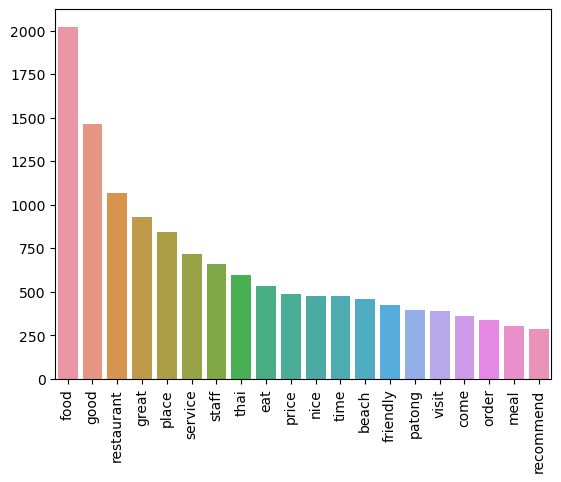

In [57]:
top20=new_df.sum(axis=0).sort_values(ascending=False)[:20]

sns.barplot(x=top20.index, y=top20.values)
plt.xticks(rotation=90)
plt.show()

## Word cloud

In [64]:
text=' '.join(text for text in final_30.Clean_Reviews)

In [65]:
def plot_cloud(word_cloud):
    
    plt.figure(figsize=(15,9))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

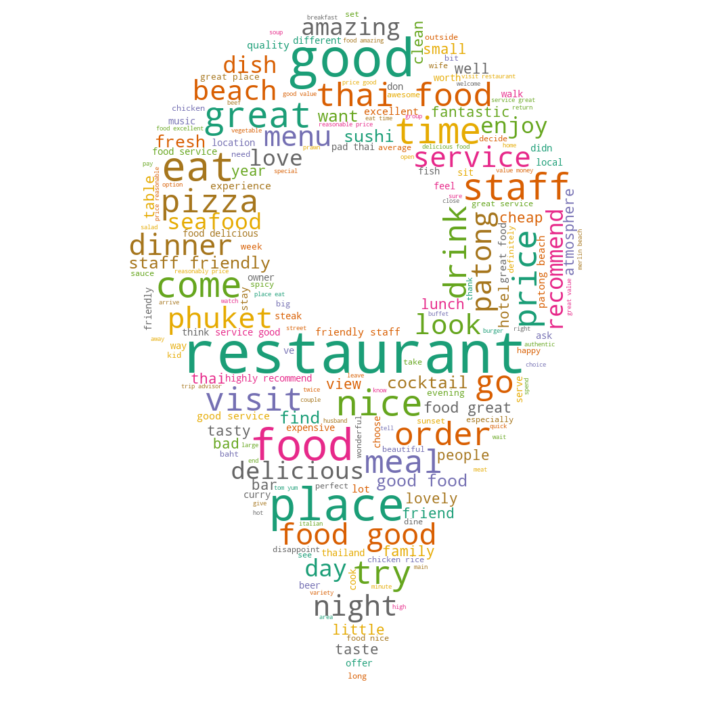

In [73]:
comment=np.array(Image.open('loc.png'))
wc=WordCloud(background_color='white', 
             colormap='Dark2', random_state=42, collocations=True, mask=comment).generate(text)
plot_cloud(wc)

## Sentiment Classification

In [77]:
TextBlob('I hate spaghetti').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [78]:
ploarity= lambda review: TextBlob(review).sentiment.polarity
subjectivity= lambda review: TextBlob(review).sentiment.subjectivity

In [80]:
final_30.loc[:, 'polarity']=final_30.loc[:, 'Clean_Reviews'].apply(ploarity)
final_30.loc[:, 'subjectivity']=final_30.loc[:, 'Clean_Reviews'].apply(subjectivity)

In [81]:
final_30.head()

,Hotel/Restaurant name,Review,Clean_Reviews,polarity,subjectivity
0,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...,pleasure visit sizzle rooftop restaurant speci...,0.674603,0.857143
1,Sizzle Rooftop Restaurant,My husband & I had dinner here for our 10 Year...,husband dinner year wedding anniversary food d...,0.775000,0.943750
2,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...,pleasure visit sizzle rooftop restaurant dinne...,0.531746,0.738095
3,Sizzle Rooftop Restaurant,This was a very high end dining experience on ...,high end dining experience honeymoon sofitel a...,0.384000,0.566000
4,Sizzle Rooftop Restaurant,One of the best meals we had in the three week...,good meal week spend thailand staff exceptiona...,0.683333,0.800000


In [87]:
final_30['Classification'] = 'Neutral'
final_30['Classification'] = np.where(final_30['polarity'] >= 0.05, 'positive', final_30['Classification'])
final_30['Classification'] = np.where(final_30['polarity'] <= -0.05, 'negative', final_30['Classification'])

In [89]:
final_30.head()

,Hotel/Restaurant name,Review,Clean_Reviews,polarity,subjectivity,Classification
0,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...,pleasure visit sizzle rooftop restaurant speci...,0.674603,0.857143,positive
1,Sizzle Rooftop Restaurant,My husband & I had dinner here for our 10 Year...,husband dinner year wedding anniversary food d...,0.775000,0.943750,positive
2,Sizzle Rooftop Restaurant,We had the pleasure of visiting Sizzle Rooftop...,pleasure visit sizzle rooftop restaurant dinne...,0.531746,0.738095,positive
3,Sizzle Rooftop Restaurant,This was a very high end dining experience on ...,high end dining experience honeymoon sofitel a...,0.384000,0.566000,positive
4,Sizzle Rooftop Restaurant,One of the best meals we had in the three week...,good meal week spend thailand staff exceptiona...,0.683333,0.800000,positive


In [91]:
final_30.Classification.value_counts(normalize=True)

positive    0.847114
negative    0.077624
Neutral     0.075262
Name: Classification, dtype: float64